## HomeWork_3

For this homework you are going to implement the unsharp masking filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia page for more details. 

### Unsharp Masking (USP)

The USM technique consists of the following steps:

- Load the image you will be working with.
- Create a blurred (unsharp) version of the original image.
- Add the unsharp image (with a certain weight) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def get_stats_of_pic(pic, name="No name"):
    """
    print max, mean, min, shape and dtype of picture
    """
    print(f'{name}:\n max: {np.max(pic)},\n mean: {np.mean(pic)},\n min: {np.min(pic)},\n shape: {pic.shape},\n dtype: {pic.dtype}\n')

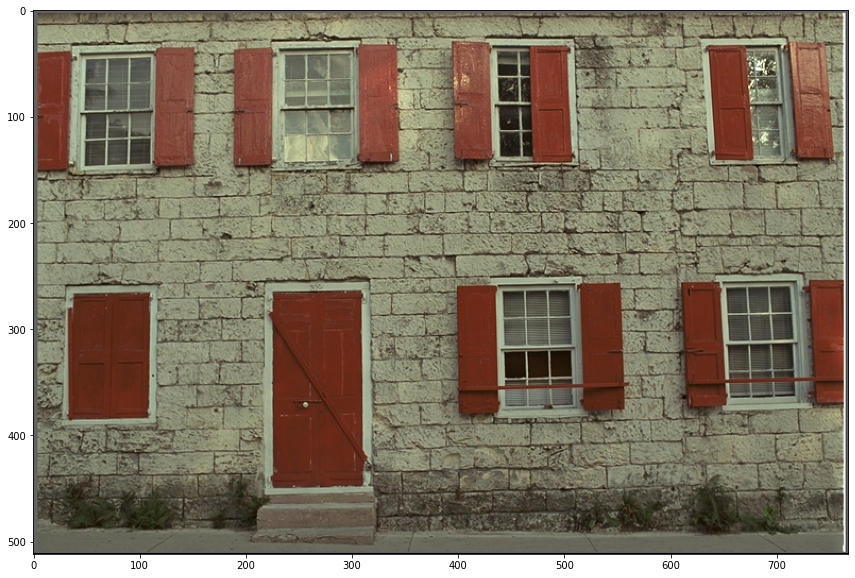

In [3]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

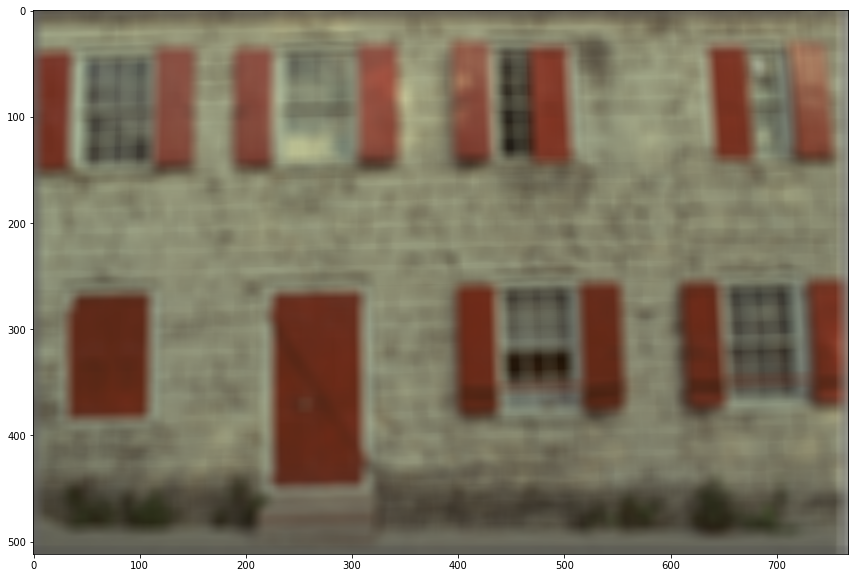

In [4]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=7)
plt.imshow(unsharp)

In [5]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)
get_stats_of_pic(diff, 'diff')

diff:
 max: 169.0,
 mean: -0.11414167284965515,
 min: -152.0,
 shape: (512, 768, 3),
 dtype: float32



Apply USM to get the resulting image using: **sharpened = original + (original − unsharp) × amount**

*Note: Again, take care of underflows/overflows if necessary.*

diff_mult_amount:
 max: 92.95000457763672,
 mean: -0.06277790665626526,
 min: -83.5999984741211,
 shape: (512, 768, 3),
 dtype: float32

img:
 max: 255,
 mean: 105.6313705444336,
 min: 0,
 shape: (512, 768, 3),
 dtype: uint8

sharpened:
 max: 347.95001220703125,
 mean: 105.56857299804688,
 min: -74.5999984741211,
 shape: (512, 768, 3),
 dtype: float32



(<AxesSubplot:title={'center':'Sharpened'}>,
 Text(0.5, 1.0, 'Sharpened'))

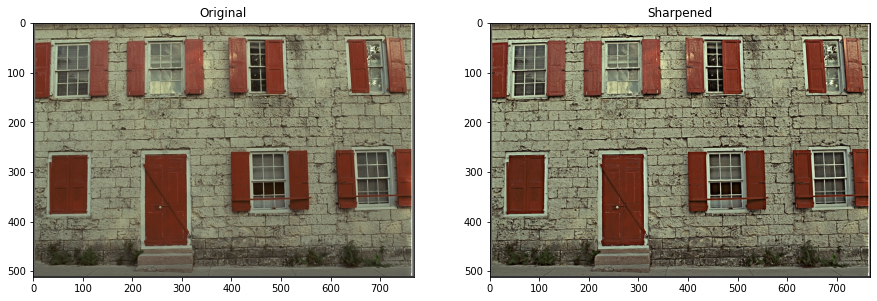

In [6]:
amount = 0.55
diff_mult_amount = diff * amount
get_stats_of_pic(diff_mult_amount, 'diff_mult_amount')

sharpened = img + diff_mult_amount

get_stats_of_pic(img, 'img')
get_stats_of_pic(sharpened, 'sharpened')

sharpened[sharpened < 0.0] = 0.0
sharpened[sharpened > 255.0] = 255.0

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(sharpened.astype(np.uint8)), plt.title('Sharpened')


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x115bcf48>)

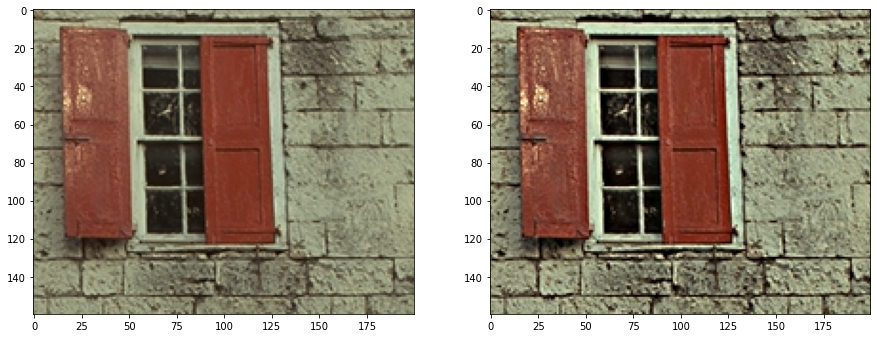

In [7]:
plt.subplot(121), plt.imshow(img[20:180, 380:580, :])
plt.subplot(122), plt.imshow(sharpened.astype(np.uint8)[20:180, 380:580, :])

## Questions

- What is a good (reasonable) value for the amount parameter?
  - What happens if it is too small?
  - What happens if it is too large?

## Answers

USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Amount parameter multiplies difference between original image and blurred image (musk), good results are in
range [0.5, 3.0]. Of course, this depends on levels of intensity of original too.
If *amount* is too small, than contribution of *(original − unsharp) × amount* is negligible and no sufficient
changes will be found.
If *amount* is too large, than contribution of *(original − unsharp) × amount* is huge, that makes small details to sharp
and scene looks unnatural.
Mask can be vary as a parameter too.